<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_interakcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python alapok interaktivitás (ipywidgets)

<https://klajosw.blogspot.com/>

# Interaktív függvények megjelenítése

Az alábbiakban vizsgáljunk meg egy egyszerű módszert arra, hogy hogyan tehetjük Python-függvényeinket interaktívvá!
Ehhez az `ipywidgets` csomag lesz segítségünkre!




<h3 style='color: darkcyan'>Interaktivitás</h3>

>```python
>from ipywidgets import *           # az interaktivitásért felelős csomag
>
>def freki(t,omega):                  #függvény amivel játszunk
>    plot(t,sin(omega*t))   
>
>interact(freki,omega=(0,10,0.1));  #játszás
>```


Mostanra már tudjuk, hogy hogyan ábrázoljunk egy matematikai függvényt:

Populating the interactive namespace from numpy and matplotlib


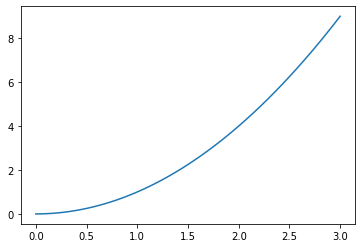

In [0]:
## Egyszerű plot négyzet függvény
# Az alábbi paranccsal alapvető matplotlib és numpy függvényeket töltünk be.
%matplotlib inline
%pylab inline 

x=linspace(0,3,100) #mintavételezési pontok legyártása
y=x**2              #függvény kiértékelése a mintavételezési pontokban
plot(x,y)           #ábrázolás

Populating the interactive namespace from numpy and matplotlib


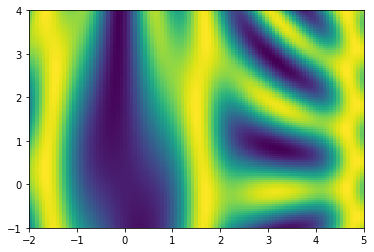

In [0]:
## Egyszerű plot, kétváltozós függvény
# Az alábbi paranccsal alapvető matplotlib és numpy függvényeket töltünk be.
%matplotlib inline
%pylab inline 

x2, y2 = meshgrid(linspace(-2,5,100),linspace(-1,4,100))  #2D mintavételezés
z2 = sin(x2) ** 10 + cos(10 + y2 * x2) * cos(x2)          #kiértékelés                  
pcolor(x2,y2,z2)                                          #ábrázolás

Populating the interactive namespace from numpy and matplotlib


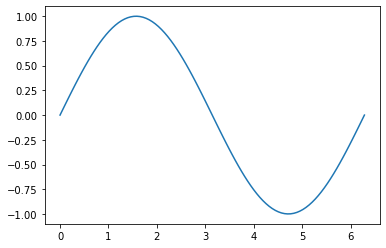

In [0]:
## Egyszerű plot szinusz függvény
# Az alábbi paranccsal alapvető matplotlib és numpy függvényeket töltünk be.
%matplotlib inline
%pylab inline                      

from ipywidgets import *  # az interaktivitásért felelős csomag
t=linspace(0,2*pi,100);
plot(t,sin(t))

Írjunk egy függvényt, ami egy megadott frekvenciájú jelet rajzol ki!

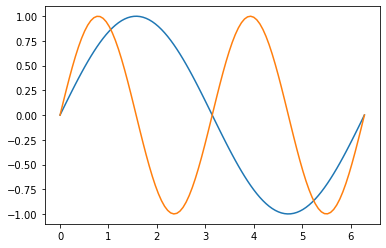

In [0]:
## Egyszerű plot szinusz függvény
# Az alábbi paranccsal alapvető matplotlib és numpy függvényeket töltünk be.
%matplotlib inline
%pylab inline    

# a függvény definiciója
t=linspace(0,2*pi,100);
def freki(omega):    
    plot(t,sin(omega*t))
    
freki(1.0)  # függvény meghívása 1.
freki(2.0)  # függvény meghívása 2.

Most jön a varázslat! Az `interact()` függvény segítségével interaktívvá tehetjük a fent definiált függvényünket!

In [0]:
## interaktívvá tett függvény megjelenítés
# Az alábbi paranccsal alapvető matplotlib és numpy függvényeket töltünk be.
%matplotlib inline
%pylab inline    

# a függvény definiciója
t=linspace(0,2*pi,100);
def freki(omega):    
    plot(t,sin(omega*t))
    
interact(freki,omega=(0,10,0.1))  # függvény interaktív meghívása 

Populating the interactive namespace from numpy and matplotlib


interactive(children=(FloatSlider(value=5.0, description='omega', max=10.0), Output()), _dom_classes=('widget-…

<function __main__.freki(omega)>

Nézzük meg egy kicsit közelebbről, hogy is működik ez az `interact()` konstrukció! Definiáljunk ehhez először egy nagyon egyszerű függvényt!

In [0]:
def func(x):
     print(x)

Az interact egy olyan függvény, amely az első paramétereként egy függvényt vár, és kulcsszavakként várja a függvény bemenő paramétereit! Amit visszaad, az egy interaktív **widget**, ami lehet sokfajta, de alapvetően azt a célt szolgálja, hogy a **func** függvényt kiszolgálja. Annak ad egy bemenő paramétert, lefuttatja, majd vár, hogy a felhasználó újra megváltoztassa az állapotot.
Ha a kulcsszavas argumentumnak zárójelbe írt egész számokat adunk meg, akkor egy egész számokon végigmenő csúszkát kapunk:

In [0]:
interact(func,x=(0,10)); 

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

Ha egy `bool` értéket adunk meg, akkor egy pipálható dobozt:

In [0]:
interact(func,x=False);

interactive(children=(Checkbox(value=False, description='x'), Output()), _dom_classes=('widget-interact',))

Ha egy általános listát adunk meg, akkor egy legördülő menüt kapunk:

In [0]:
interact(func,x=['hétfő','kedd','szerda']);

interactive(children=(Dropdown(description='x', options=('hétfő', 'kedd', 'szerda'), value='hétfő'), Output())…

Ha a sima zárójelbe írt számok nem egészek (legalább az egyik) akkor egy float csúszkát kapunk:

In [0]:
interact(func,x=(0,10,0.1));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0), Output()), _dom_classes=('widget-inte…

Ha pontosan specifikálni szeretnénk, hogy milyen interaktivitást akarunk, akkor azt az alábbiak szerint tehetjük meg, 


egész csúszka$\rightarrow$IntSlider()

float csúszka$\rightarrow$FloatSlider()

legördülő menü$\rightarrow$Dropdown()

pipa doboz$\rightarrow$Checkbox()

szövegdoboz$\rightarrow$Text()

Ezt alább néhány példa illusztrálja:

In [0]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

@widgets.interact
def f(x=5):
    print(x)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

In [0]:
@widgets.interact(x=(0, 5))
def f(x=5):
    print(x)

interactive(children=(IntSlider(value=5, description='x', max=5), Output()), _dom_classes=('widget-interact',)…

In [0]:
@widgets.interact_manual(
    color=['blue', 'red', 'green'], lw=(1., 10.))
def plot(freq=1., color='blue', lw=2, grid=True):
    t = np.linspace(-1., +1., 1000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            lw=lw, color=color)
    ax.grid(grid)

interactive(children=(FloatSlider(value=1.0, description='freq', max=3.0, min=-1.0), Dropdown(description='col…

In [0]:
freq_slider = widgets.FloatSlider(
    value=2.,
    min=1.,
    max=10.0,
    step=0.1,
    description='Frequency:',
    readout_format='.1f',
)
freq_slider

FloatSlider(value=2.0, description='Frequency:', max=10.0, min=1.0, readout_format='.1f')

In [0]:
color_buttons = widgets.ToggleButtons(
    options=['blue', 'red', 'green'],
    description='Color:',
)
color_buttons

ToggleButtons(description='Color:', options=('blue', 'red', 'green'), value='blue')

In [0]:
color_picker = widgets.ColorPicker(
    concise=True,
    description='Background color:',
    value='#efefef',
)
color_picker

ColorPicker(value='#efefef', concise=True, description='Background color:')

In [0]:
## Komlex minta
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

range_slider = widgets.FloatRangeSlider(
    value=[-1., +1.],
    min=-5., max=+5., step=0.1,
    description='xlim:',
    readout_format='.1f',
)
# range_slider

title_textbox = widgets.Text(
    value='Hello World',
    description='Title:',
)
# title_textbox

grid_button = widgets.ToggleButton(
    value=False,
    description='Grid',
    icon='check'
)
# grid_button

button = widgets.Button(
    description='Plot',
)
#button

color_picker = widgets.ColorPicker(
    concise=True,
    description='Background color:',
    value='#efefef',
)
#color_picker

def plot2(b=None):
    xlim = range_slider.value
    freq = freq_slider.value
    grid = grid_button.value
    color = color_buttons.value
    title = title_textbox.value
    bgcolor = color_picker.value

    t = np.linspace(xlim[0], xlim[1], 1000)
    f, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            color=color)
    ax.grid(grid)
    
@button.on_click
def plot_on_click(b):
    out.clear_output(wait=True)
    with out:
        plot2()
        plt.show()
        
tab1 = VBox(children=[freq_slider,
                      range_slider,
                      ])
tab2 = VBox(children=[color_buttons,
                      HBox(children=[title_textbox,
                                     color_picker,
                                     grid_button]),
                                     ])

out = widgets.Output()
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'styling')
VBox(children=[tab, button, out])


$\pi$ iteratív meghatározása 



In [0]:
## interaktívvá tett függvény megjelenítés
# Az alábbi paranccsal alapvető matplotlib és numpy függvényeket töltünk be.
%pylab inline  
%matplotlib inline


from ipywidgets import interact

def fun(n):
    a=sqrt(2)
    for i in range(1,n):
        a=sqrt((1-sqrt(1-a**2/4))**2+a**2/4)
    return a*2**n
phi=linspace(0,pi/2,60)
figsize(8,8)

def geo(m=0):
    plot([0,0,1],[1,0,0],color='black')
    plot(cos(phi),sin(phi),lw=25,color='black')
    p=linspace(0,pi/2,2**m+1)
    plot([0,0,cos(p[1])],[1,0,sin(p[1])],color='black')
    plot(cos(p[0::2]),sin(p[0::2]),'--',lw=4,color='gray')
    plot(cos(p),sin(p),'o-',lw=8,color='red',ms=20,mec='red')
    #
    axes().set_aspect('equal')
    xlim(-0.1,1.1)
    ylim(-0.1,1.1)
    axis('off');
    #
    text(0.7,0.95,r'$\pi/2=$'+str(pi/2),fontsize=50)
    text(0.7,0.8,r'$\;\,s=$'+str(fun(m+1)/2),fontsize=50,color='red')
    if m==1:
        text(0.5,-0.1,r'$1$',fontsize=50)
        text(-0.1,0.5,r'$1$',fontsize=50)
        text(0.5,0.6,r'$x$',fontsize=50)
        text(0.1,0.35,r'$1-x$',fontsize=50)
        text(0.5,0.2,r'$\frac{a_{m-1}}{2}$',fontsize=50)
        text(0.9,0.35,r'$a_m$',fontsize=50,color='red')
        text(1.2,0.5,r'$a^2_{m-1}/4+(1-x)^2=1$',fontsize=50)
        text(1.2,0.3,r'$a^2_{m-1}/4+x^2=a^2_m$',fontsize=50)
        text(1.2,0.1,r'$s=2^m a_m$',fontsize=50,color='red')
    elif m==10:
        text(1.1,0.4,r'$\lim_{m\rightarrow\infty} \left (2^m a_m\right)=\pi/2 $',fontsize=60,color='magenta')
    
interact(geo,m=(0,17))

Populating the interactive namespace from numpy and matplotlib


interactive(children=(IntSlider(value=0, description='m', max=17), Output()), _dom_classes=('widget-interact',…

<function __main__.geo(m=0)>